# Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Part1 - Import the training set

In [3]:
dataset_train = pd.read_csv('../Deep Learning Data Udemy/RNN/Google_Stock_Price_Train.csv')
# Get numpy array
training_set = dataset_train.iloc[:,1:2].values

# Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
trainin_set_scaled = sc.fit_transform(training_set)

# Creating a data strucure with 60 timesteps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(trainin_set_scaled[i-60:i,0])
    y_train.append(trainin_set_scaled[i,0])

X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)

# Reshaping the data

In [13]:
X_train_arr = np.reshape(X_train_arr, (X_train_arr.shape[0],X_train_arr.shape[1], 1))

In [15]:
X_train_arr.shape

(1198, 60, 1)

# Part2 - Building the RNN

# Importing the Keras libraries and Packages

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

2024-12-18 06:55:23.518555: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 06:55:23.525716: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 06:55:23.554410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734504923.603916  837210 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734504923.619153  837210 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 06:55:23.660925: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## Initialising the RNN

In [17]:
regressor = Sequential()

## Adding the first LSTM layer and some Dropout regularization

In [18]:
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train_arr.shape[1],1)))
regressor.add(Dropout(0.2))

2024-12-18 07:03:11.209603: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/toodou/miniconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
#　Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#　Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

#　Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [20]:
# Compoleing the RNN
regressor.compile(optimizer ='adam', loss = 'mean_squared_error')

In [23]:
# Fitting the RNN to the Training set
regressor.fit(X_train_arr, y_train_arr, epochs = 100,batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - loss: 0.1189
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0087
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0063
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0049
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0047
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0046
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0041
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0045
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0039
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0050
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0051
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 0.0038
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - loss: 0.0044
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s

# Part3 - Making the predictions and visualising the results

In [25]:
dataset_test = pd.read_csv('../Deep Learning Data Udemy/RNN/Google_Stock_Price_Test.csv')
# Get numpy array
real_stock_price = dataset_test.iloc[:,1:2].values

In [40]:
# Getting the predictions stock price of 2017
dataset_total = pd.concat([dataset_train['Open'],dataset_test['Open']],axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test_arr = np.array(X_test)
X_test_arr = np.reshape(X_test_arr, (X_test_arr.shape[0],X_test_arr.shape[1], 1))

In [46]:
# Predict
predicted_stock_price = regressor.predict(X_test_arr)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


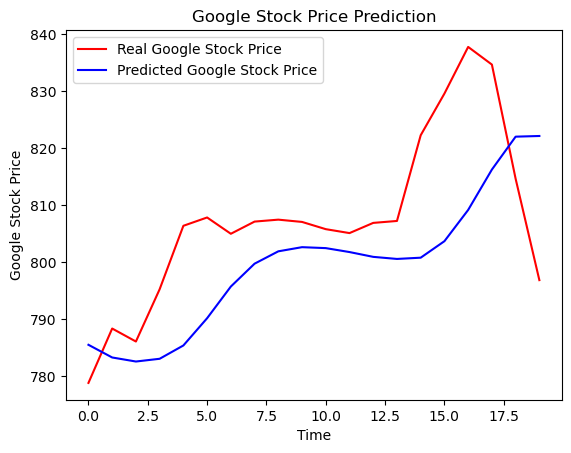

In [47]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()